In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [49]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [50]:
X

array([[ 7.35207331,  8.18243608],
       [-2.52913827,  1.82289322],
       [ 7.56710401,  9.81132743],
       ...,
       [ 4.7964718 ,  9.54815638],
       [-3.7427759 , -6.1277603 ],
       [ 6.62691226,  8.0446803 ]], shape=(1000, 2))

In [51]:
y

array([1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0,
       0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2,
       0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2,

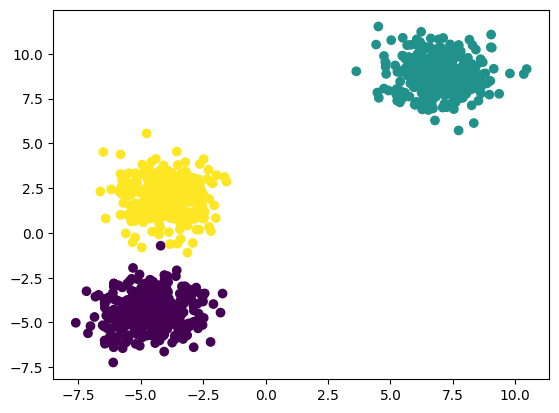

In [52]:
plt.scatter(X[:,0],X[:,1],c = y)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [54]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [55]:
## Elbow method
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(X_train_Scaled)
    wcss.append(model.inertia_)

In [56]:
wcss

[1400.0000000000011,
 205.83788018894586,
 47.069406088603024,
 41.14838841161415,
 35.85444486905646,
 32.835935990040426,
 27.05487851052097,
 24.14236267304849,
 22.796600213626437,
 20.861286482168772]

Text(0, 0.5, 'WCSS')

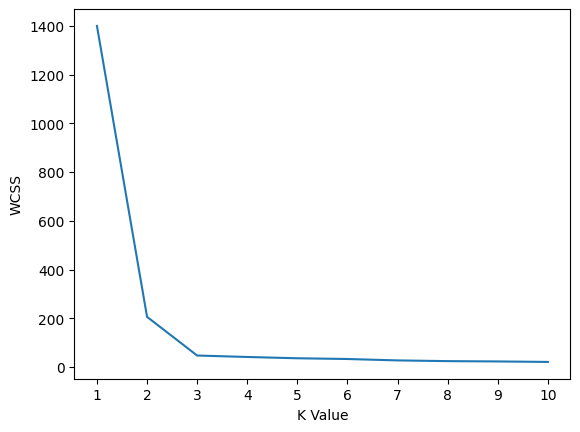

In [57]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('K Value')
plt.ylabel('WCSS')

In [58]:
model = KMeans(n_clusters=3,init='k-means++')

In [59]:
model.fit(X_train_Scaled)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [60]:
y_pred = model.predict(X_test_Scaled)

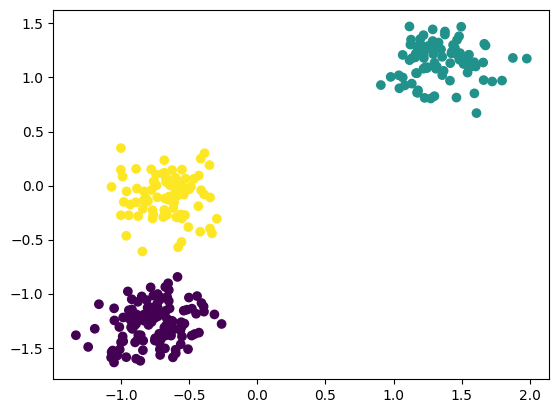

In [61]:
plt.scatter(X_test_Scaled[:,0],X_test_Scaled[:,1],c = y_pred)

## Validating k-Value

##### 1) Kneelocator
##### 2) Silhoutee Scoring

In [62]:
## Kneelocator
!pip install kneed


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from kneed import KneeLocator

In [64]:
kl = KneeLocator(range(1,11),wcss,curve = 'convex',direction='decreasing')

In [65]:
kl.curve

'convex'

In [66]:
kl.elbow

np.int64(3)

In [67]:
## Silhouttee Scoring
from sklearn.metrics import silhouette_score

In [68]:
silhouette_coeff =  []
for k in range(2,11):
    model = KMeans(n_clusters=k,init='k-means++')
    model.fit(X_train_Scaled)
    silhouette_coeff.append(silhouette_score(X_train_Scaled,model.labels_))

In [69]:
silhouette_coeff

[0.7758549995735312,
 0.772797915322643,
 0.6592336527456182,
 0.51606068957173,
 0.33228664595186935,
 0.3372501715982625,
 0.33044064732869044,
 0.3293043139630487,
 0.33941376482863306]

Text(0, 0.5, 'Silhoutte Score')

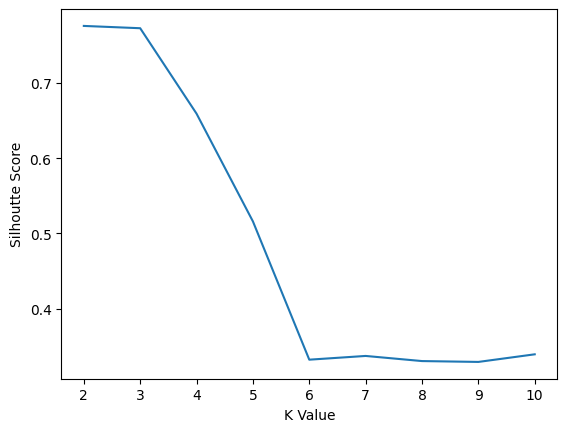

In [70]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel('K Value')
plt.ylabel('Silhoutte Score')

In [23]:
X,y = make_blobs(n_samples=1000,n_features=100,centers = 5)

In [24]:
X

array([[-7.64542484, -0.46358257,  6.20034042, ...,  1.09761249,
         6.15015312,  8.57417679],
       [ 6.99834526,  3.04802504, -1.79844831, ...,  4.49161257,
         0.10787657, -1.96152097],
       [-2.40752163,  8.80646757,  6.45096901, ...,  2.99157144,
        -3.03423849,  2.1677358 ],
       ...,
       [-3.3096339 , -0.53037818,  5.9234309 , ..., -0.32012533,
         6.67052618,  9.05953575],
       [ 8.9231239 , -3.00036588, -5.44248785, ...,  2.69991565,
         7.79840018,  5.37250936],
       [-1.73436007,  8.36004101,  4.23860024, ...,  2.37629698,
        -2.04924038,  2.31967958]], shape=(1000, 100))

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
from sklearn.decomposition import PCA

In [27]:
X_scaled = scaler.fit_transform(X)

In [28]:
pca = PCA(n_components=2)

In [29]:
pca.fit(X_scaled)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [30]:
pca.explained_variance_

array([26.29976621, 25.38984726])

In [31]:
df = pca.transform(X_scaled)

In [32]:
df

array([[-6.20273414, -1.91754967],
       [-1.68016929,  2.72198316],
       [-3.1357185 ,  4.45994435],
       ...,
       [-5.52336175, -1.77181675],
       [ 8.92647404,  3.67922034],
       [-3.30664473,  5.12346136]], shape=(1000, 2))

In [34]:
from sklearn.metrics import silhouette_score
wcss = []
for i in range(2,12):
    model = KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(df)
    wcss.append(model.inertia_)
    print(f"for k  = {i}:", silhouette_score(df,labels=model.labels_))

    

for k  = 2: 0.6031933928093521
for k  = 3: 0.7963282166736044
for k  = 4: 0.8723218479300177
for k  = 5: 0.9147461455150289
for k  = 6: 0.81005670146895
for k  = 7: 0.6775781929649717
for k  = 8: 0.5691810274982813
for k  = 9: 0.5675595332756757
for k  = 10: 0.5649745649751169
for k  = 11: 0.43974342609166733


In [35]:
wcss

[26150.232828964694,
 6044.042753160895,
 853.1906705259739,
 101.49161068587395,
 95.08538496060858,
 87.71520676910637,
 78.79049771721861,
 74.97609836103994,
 71.00643587258558,
 64.29777007157851]

([<matplotlib.axis.XTick at 0x1557307c1d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

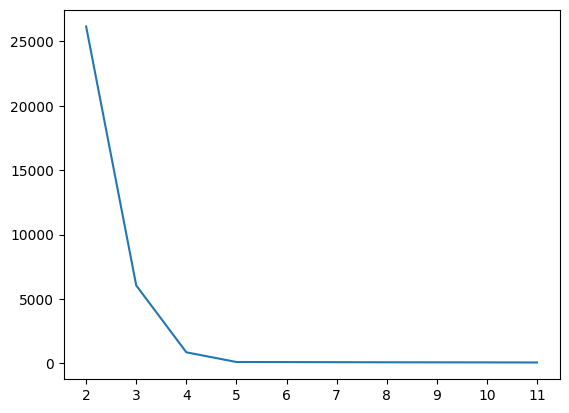

In [36]:
plt.plot(range(2,12),wcss)
plt.xticks(range(2,12))

In [37]:
model = KMeans(n_clusters=3,init='k-means++',random_state=42)
model.fit(df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


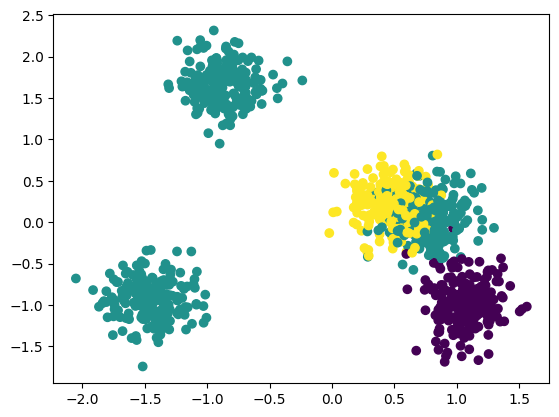

In [42]:
y_pred = model.predict(df)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = y_pred)

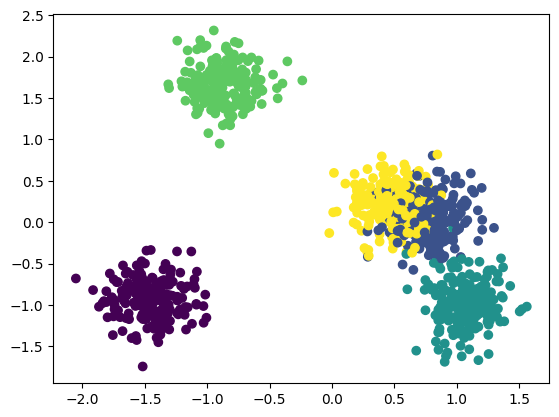

In [39]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = y)